In [34]:
#importing libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # for numerical feature scaling
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model (alternative)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
data=pd.read_csv('Heart_Disease_Prediction.csv')
data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
#checking null values in data

In [36]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
# Assuming your data is stored in a DataFrame named 'data'
X = data.drop('Heart Disease', axis=1)  # Features
y = data['Heart Disease']  # Target variable


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 27.6 KB


In [37]:
#using random forest classifier

In [7]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
from sklearn.metrics import confusion_matrix


In [38]:
#cheking accurancy, classification report and confucsion matrix

In [12]:
# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7962962962962963
Classification Report:
              precision    recall  f1-score   support

     Absence       0.81      0.88      0.84        33
    Presence       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54

Confusion Matrix:
[[29  4]
 [ 7 14]]


In [ ]:
#Display confusion matrix

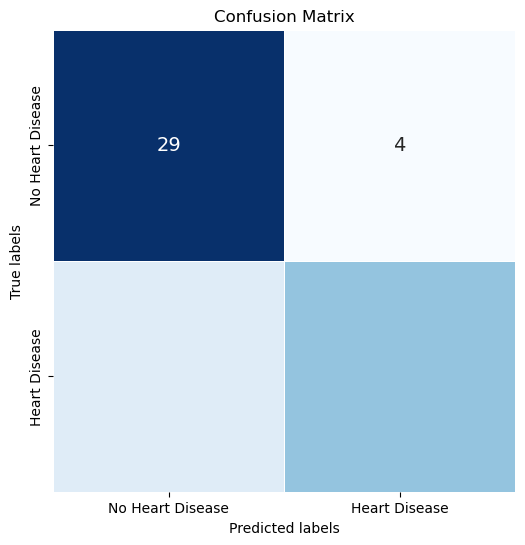

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0.5, 1.5], labels=['No Heart Disease', 'Heart Disease'])
plt.yticks(ticks=[0.5, 1.5], labels=['No Heart Disease', 'Heart Disease'])
plt.show()


In [ ]:
#using cross validation for better accuracy

In [14]:
from sklearn.model_selection import cross_val_score


In [15]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean()}")


Cross-Validation Scores:
[0.74074074 0.81481481 0.87037037 0.77777778 0.88888889]
Mean CV Accuracy: 0.8185185185185183


In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameters for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search CV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Accuracy: 0.8407407407407408


In [ ]:
#predicting heart disease is absense or presence

In [40]:
import pandas as pd

# Example data for prediction
new_data = pd.DataFrame({
    'Age': [55],                             # Example values, replace with actual data
    'Sex': [1],                              # Example values, replace with actual data
    'Chest pain type': [1],                  # Example values, replace with actual data
    'BP': [140],                             # Example values, replace with actual data
    'Cholesterol': [240],                    # Example values, replace with actual data
    'FBS over 120': [0],                     # Example values, replace with actual data
    'EKG results': [1],                      # Example values, replace with actual data
    'Max HR': [160],
    'Exercise angina': [0],                  # Example values, replace with actual data
    'ST depression': [1.5],                  # Example values, replace with actual data
    'Slope of ST': [2],                      # Example values, replace with actual data
    'Number of vessels fluro': [0],          # Example values, replace with actual data
    'Thallium': [3]                      # Example values, replace with actual data
                              # Example values, replace with actual data
})

# Ensure columns are in the same order as your training data
# Adjust these column names based on the exact columns in your X dataset
new_data = new_data[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 
                     'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 
                     'Slope of ST', 'Number of vessels fluro', 'Thallium']]

# Predict using the trained model
predictions = rf_model.predict(new_data)
print(predictions)

['Absence']
